# Metrics learning. Практика.

В данном задании нам предстоит кластеризовать клиентов банка по характеру финансового поведения с продуктом банка (кредитная карта). 

## Загрузим необходимые данные и библиотеки

In [46]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, cluster, decomposition, metrics

from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings(action='ignore')

In [47]:
data= pd.read_csv('data/CC GENERAL.csv')
print(data.shape)
data.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Обработка данных

Посмотрим описательные статистики.

In [48]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Пропуски в признаках минимального платеж по задолженности (`MINIMUM_PAYMENTS`) и лимита кредита по карте (`CREDIT_LIMIT`).

Также видно много выбросов, постараемся избавится от них, сделав диапазоны значений для различных колонок.

## Работа с пропусками

Заполним данные средним значением.

In [49]:
data_cleaned = data.copy()

data_cleaned['MINIMUM_PAYMENTS'] = data_cleaned['MINIMUM_PAYMENTS'].fillna(data_cleaned['MINIMUM_PAYMENTS'].mean())
data_cleaned['CREDIT_LIMIT'] = data_cleaned['CREDIT_LIMIT'].fillna(data_cleaned['CREDIT_LIMIT'].mean())

Проверим еще раз, что пропусков более нет.

In [50]:
data_cleaned.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Работа с выбросами

Для работы с выбросами сделаем диапазоновые значения признаков, для этого будем использовать функцию.

In [51]:
def add_range(df, columns, range_list, onesided=True):
    # Проходимся по каждому столбцу, указанному в списке 'columns'
    for column in columns:
        # Создаем новое имя столбца, добавляя '_range' к исходному имени столбца
        name = column + '_range'
        
        # Инициализируем новый столбец нулями
        df[name] = 0
        
        # Проходимся по 'range_list' для определения диапазонов и присвоения соответствующих значений новому столбцу
        for i in range(len(range_list)-1):
            # Устанавливаем значение в новом столбце равное (i+1) для строк, где значение 'column' попадает в текущий диапазон
            df.loc[(df[column] > range_list[i]) & (df[column] <= range_list[i+1]), name] = i+1
            
            # Если 'onesided' равен True, устанавливаем значение в новом столбце равное длине 'range_list'
            # для строк, где значение 'column' больше последнего значения в 'range_list'
            if onesided:
                df.loc[(df[column] > range_list[-1]), name] = len(range_list)
    
    # Удаляем исходные столбцы, указанные в списке 'columns', так как они больше не нужны
    df.drop(columns, axis=1, inplace=True)


add_range(
    data_cleaned,
    ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'CREDIT_LIMIT',
    'PAYMENTS', 'MINIMUM_PAYMENTS'],
    [0,500,1000,3000,5000,10000])

add_range(
    data_cleaned,
    ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 
    'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT'],
    np.linspace(0,1,11), onesided=False)

add_range(
    data_cleaned,
    ['PURCHASES_TRX', 'CASH_ADVANCE_TRX'],
    [0,5,10,15,20,30,50,100], onesided=False)

Удаляем признак ID карты и преобразуем данные в массив.

In [52]:
data_cleaned.drop(['CUST_ID'], axis=1, inplace=True)

X = np.asarray(data_cleaned)

### Масштабирование данных

Стандартизируем данные.

In [53]:
std_scale = preprocessing.StandardScaler()
X = std_scale.fit_transform(X)
X.shape

(8950, 17)

Определимся с количеством кластеров используя `KElbowVisualizer` из модуля `yellowbrick.cluster`. В качестве модели будем использовать Kmeans, а так же зададим максимальную границу количества кластеров модуля равную `k=20`.

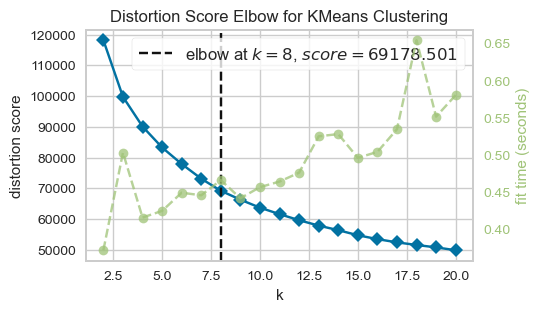

In [54]:
fig, ax = plt.subplots(figsize=(5, 3))
elbow_m = KElbowVisualizer(estimator=cluster.KMeans(random_state=42), k=20, ax=ax)
elbow_m.fit(X)
elbow_m.show();

Оптимальное количество кластеров равно 8. Занесем значение в переменную.

In [55]:
k_clust = elbow_m.elbow_value_

## Кластеризация

Обучите модель `Kmeans` с количеством кластеров, полученным ранее. 

In [56]:
kmean = cluster.KMeans(k_clust, random_state=42)
kmean.fit(X)

# Получение меток кластера для каждой точки данных после обучения модели
labels = kmean.labels_

# Объединение исходных данных и меток кластера в новый DataFrame 'clusters'
clusters = pd.concat([data_cleaned, pd.DataFrame({'cluster': labels})], axis=1)
clusters.head()

,TENURE,BALANCE_range,PURCHASES_range,ONEOFF_PURCHASES_range,INSTALLMENTS_PURCHASES_range,CASH_ADVANCE_range,CREDIT_LIMIT_range,PAYMENTS_range,MINIMUM_PAYMENTS_range,BALANCE_FREQUENCY_range,PURCHASES_FREQUENCY_range,ONEOFF_PURCHASES_FREQUENCY_range,PURCHASES_INSTALLMENTS_FREQUENCY_range,CASH_ADVANCE_FREQUENCY_range,PRC_FULL_PAYMENT_range,PURCHASES_TRX_range,CASH_ADVANCE_TRX_range,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,7
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,1
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,6
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1,6
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,7


## Анализ результатов кластеризации

Проанализируем распределения признаков по каждой группе.

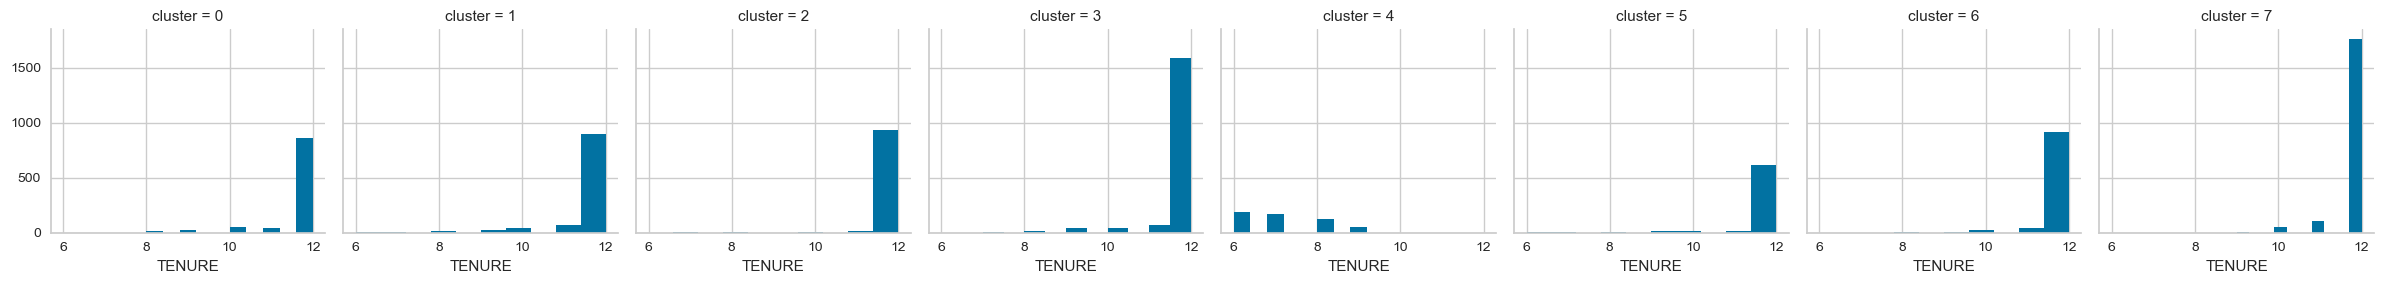

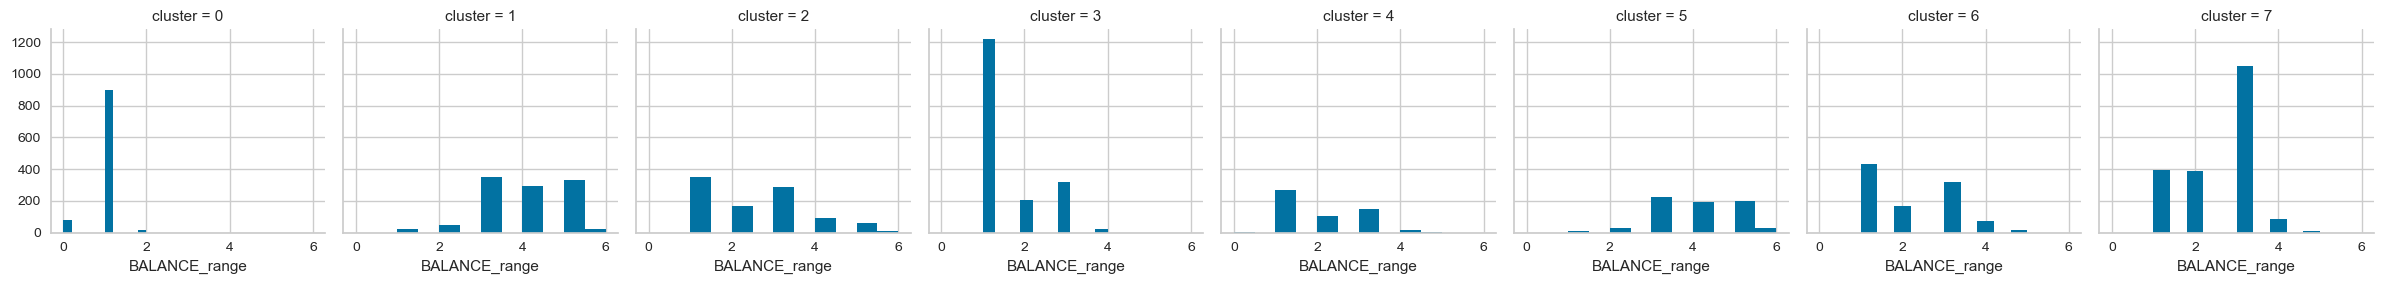

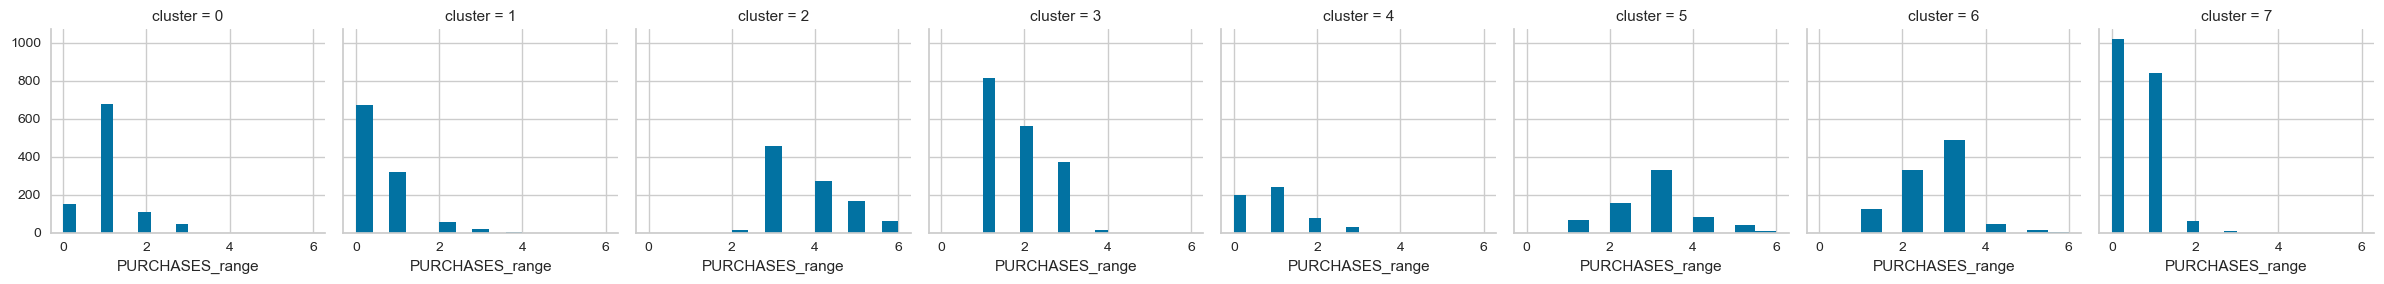

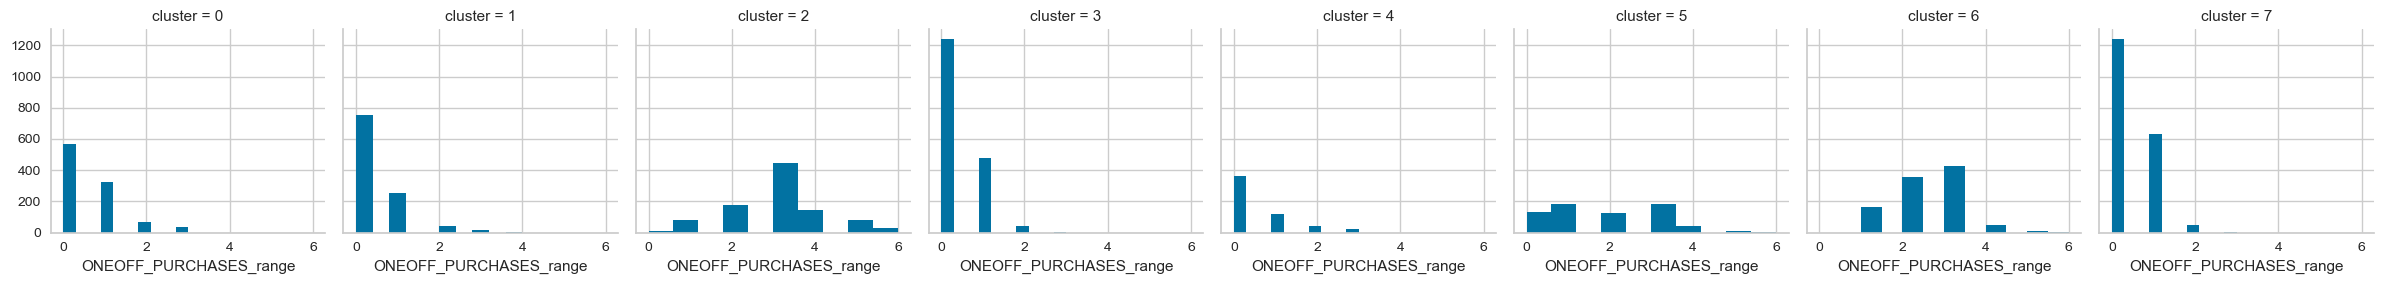

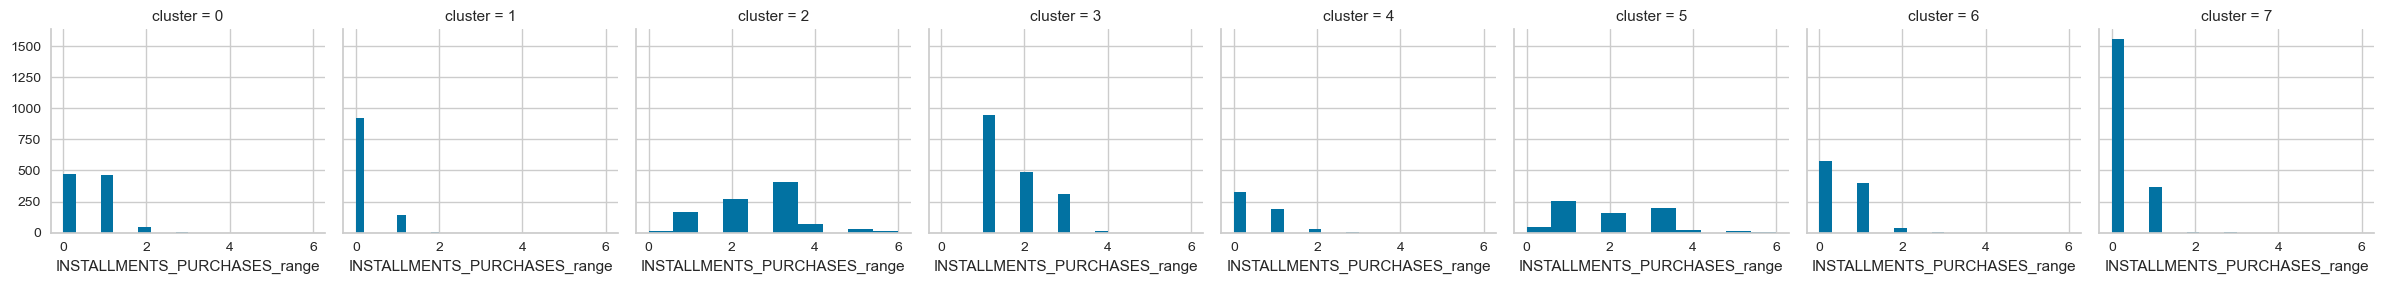

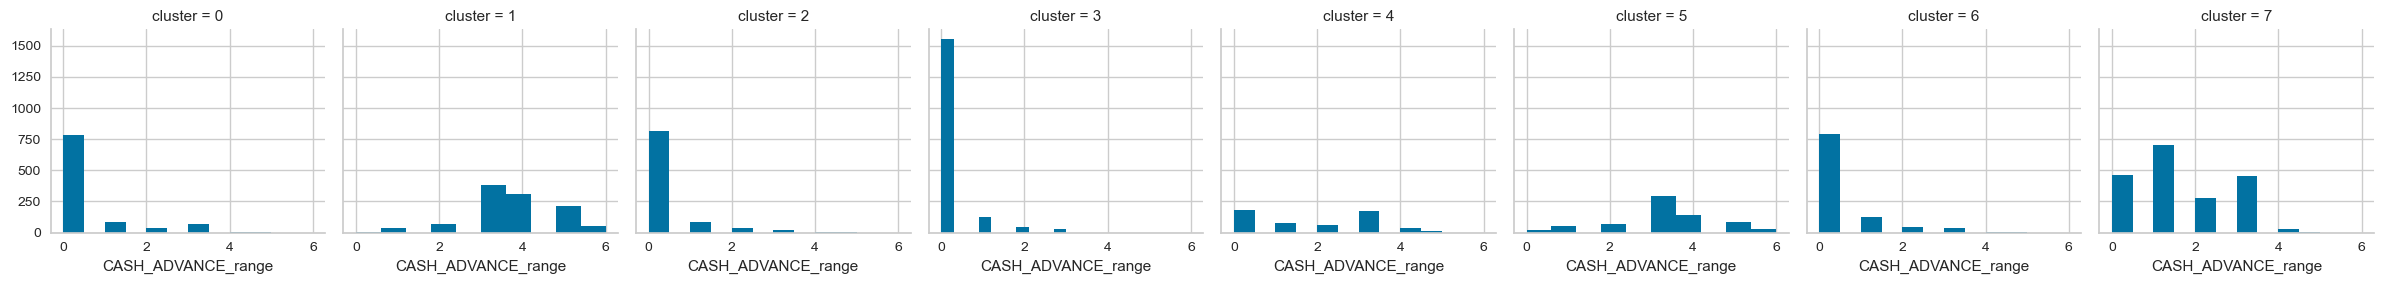

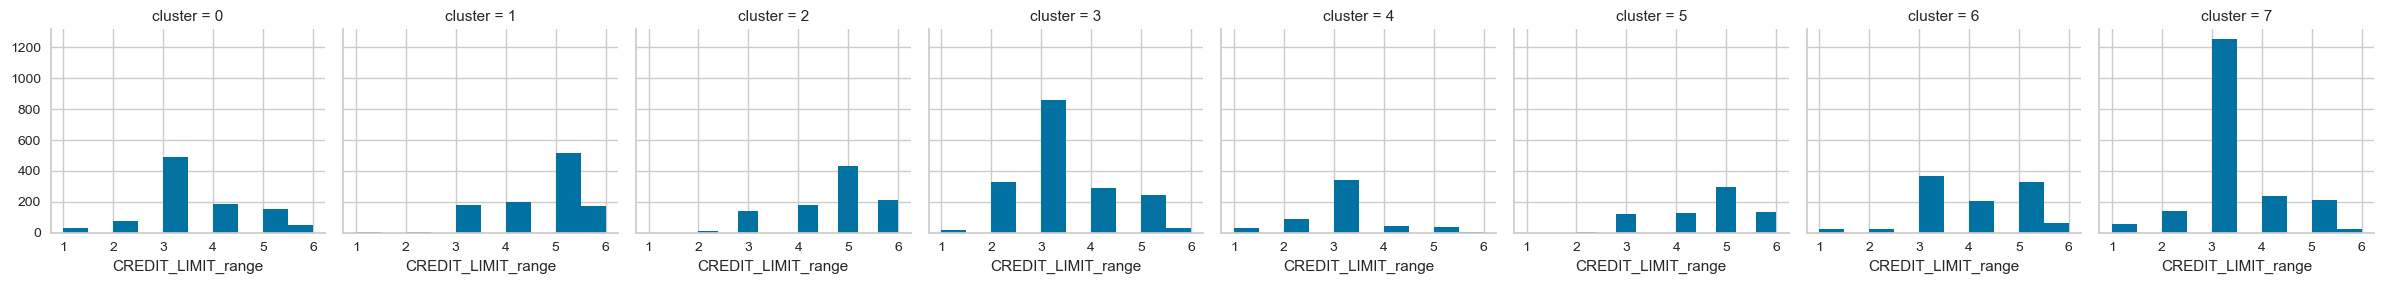

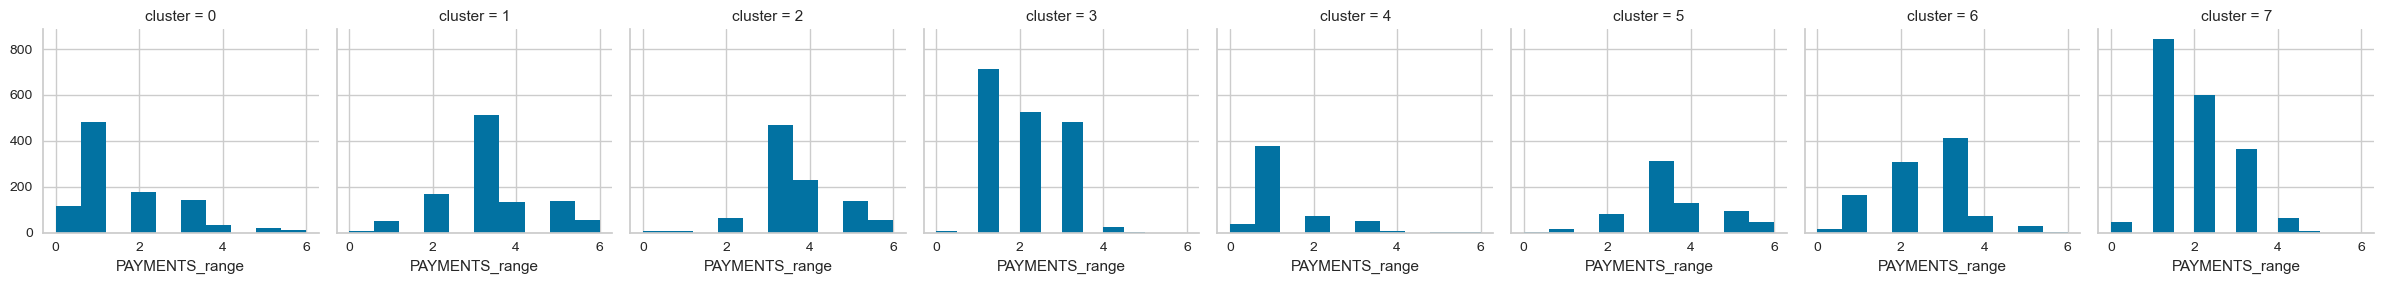

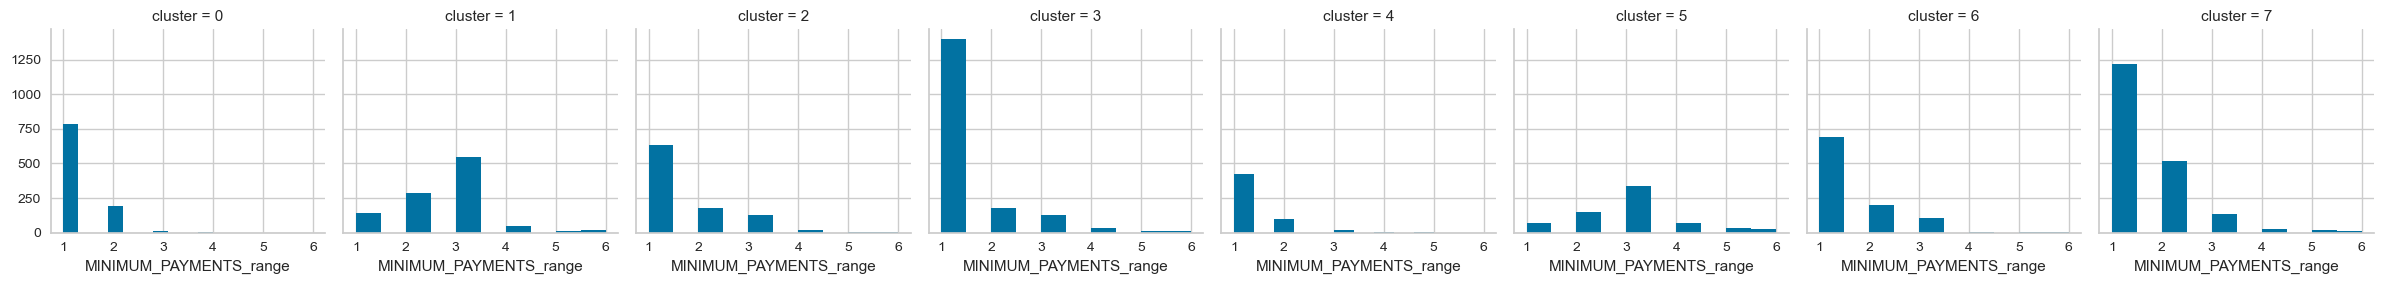

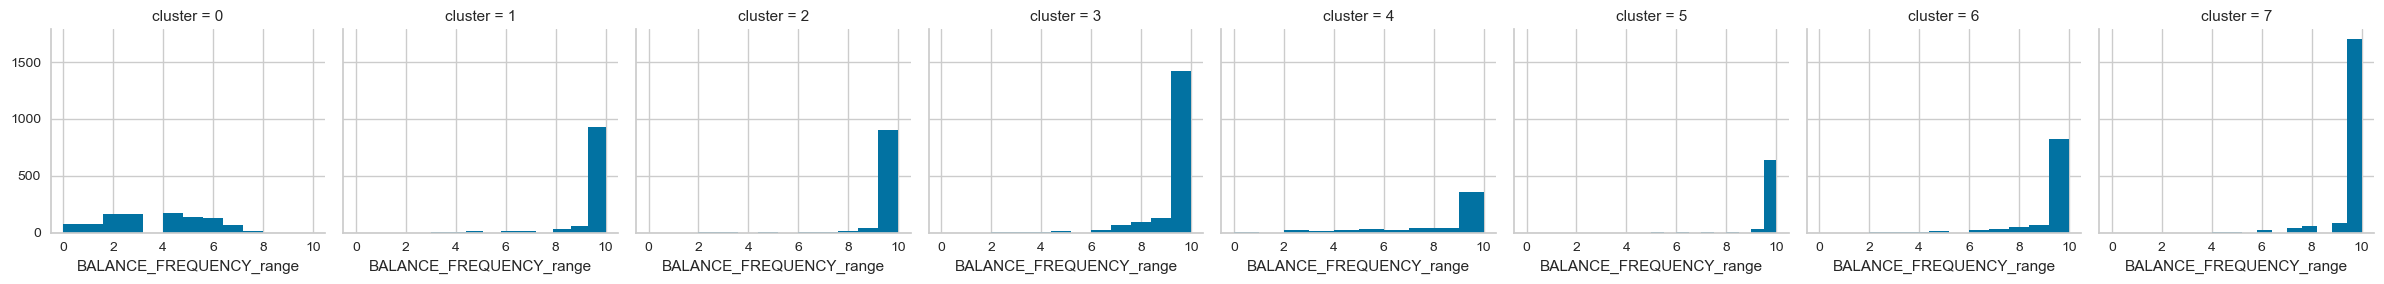

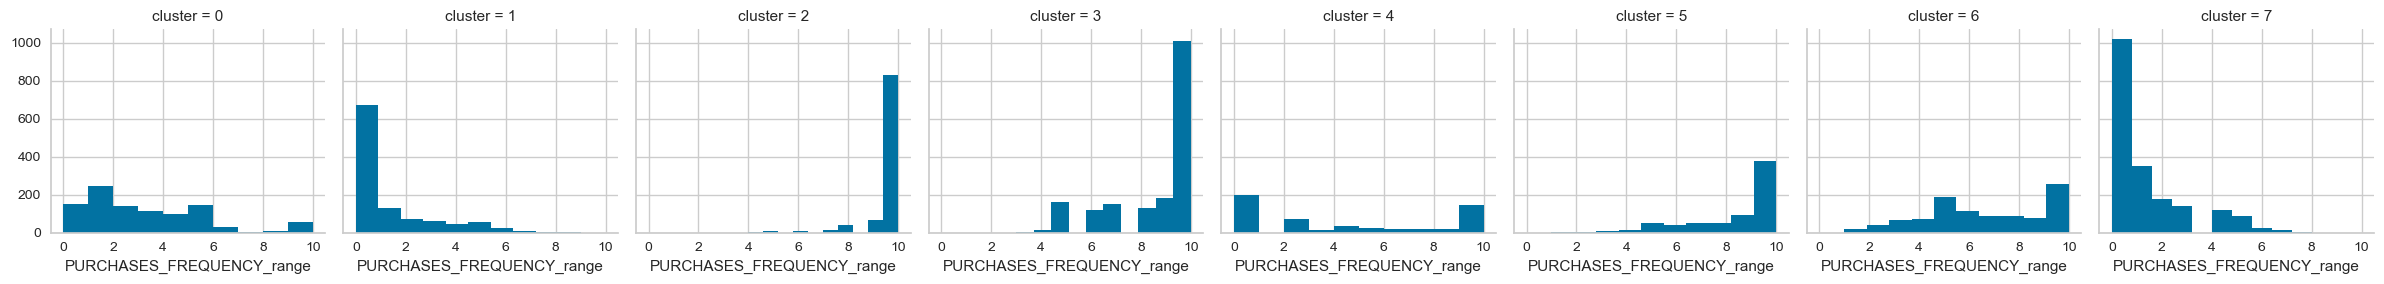

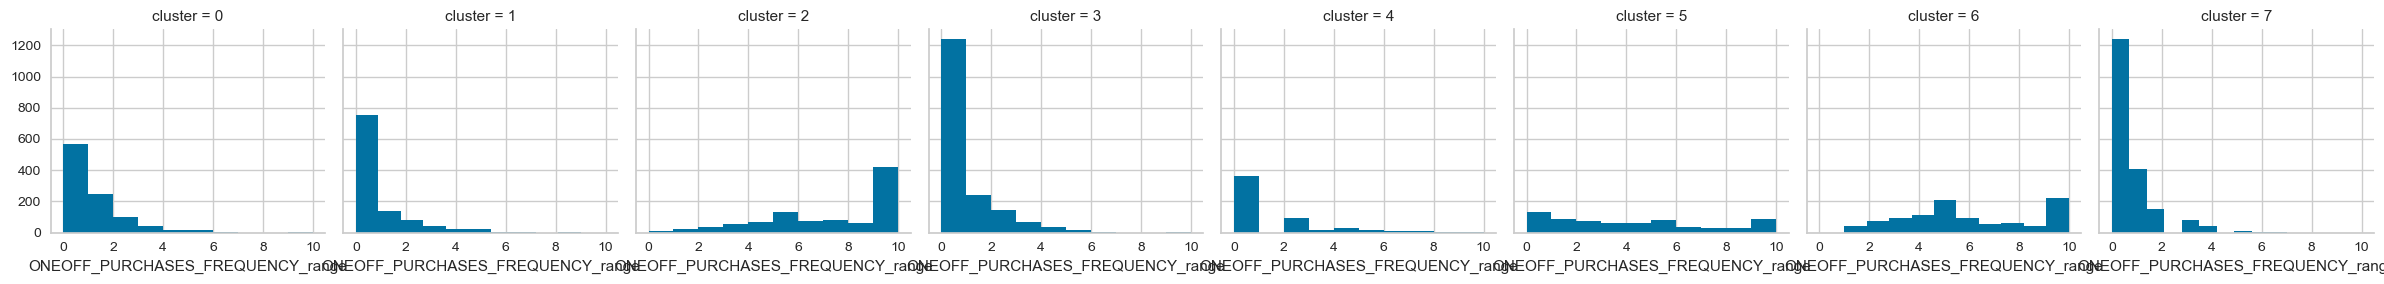

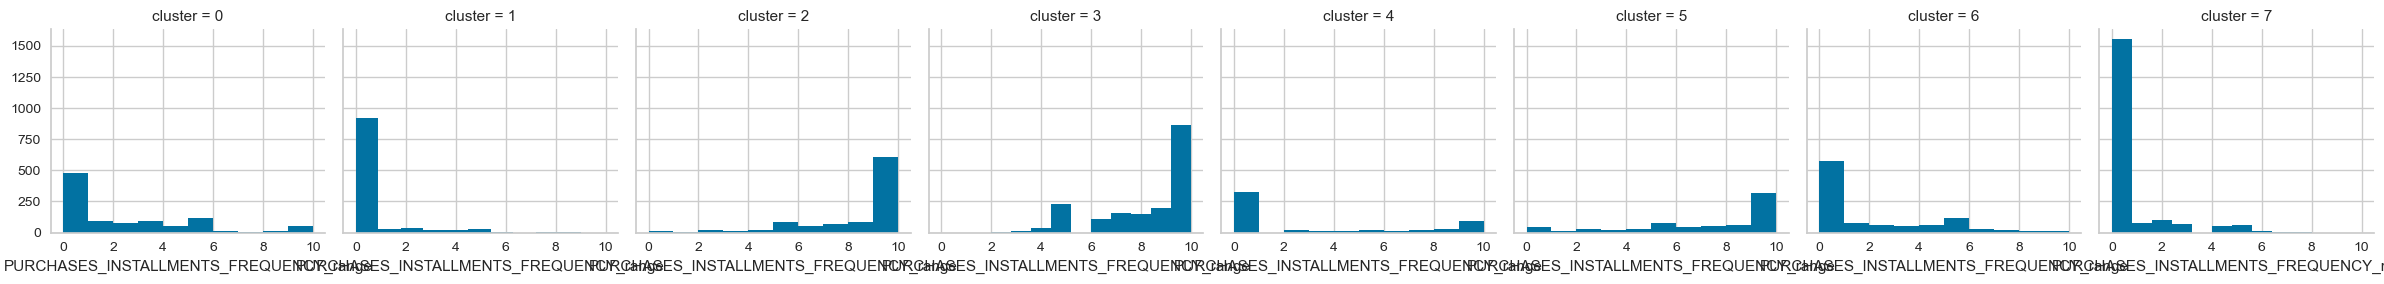

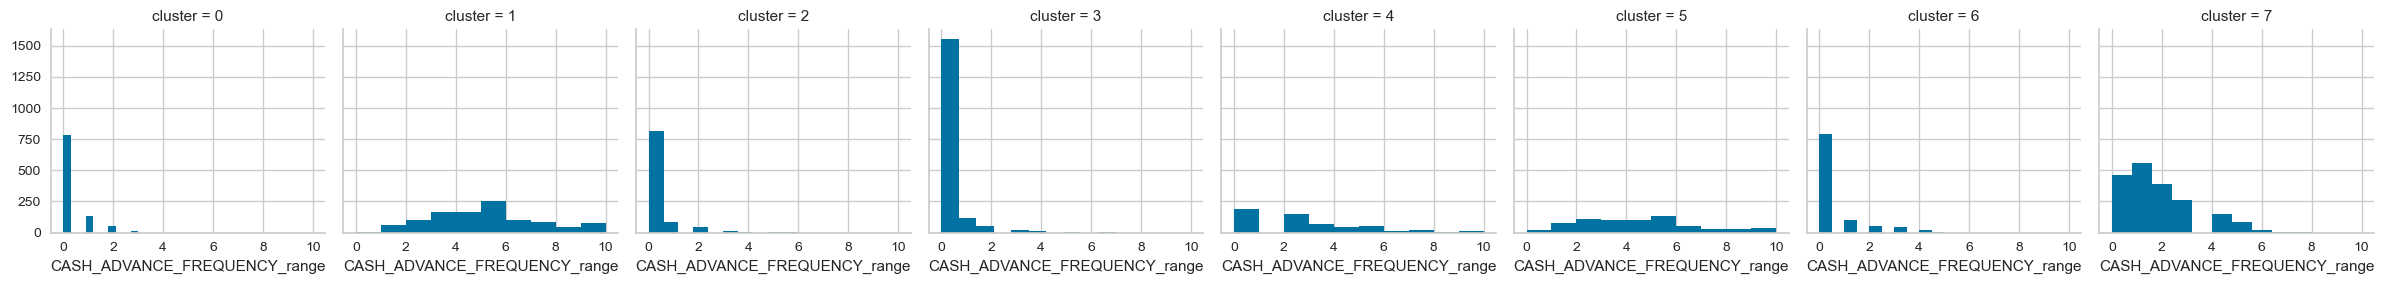

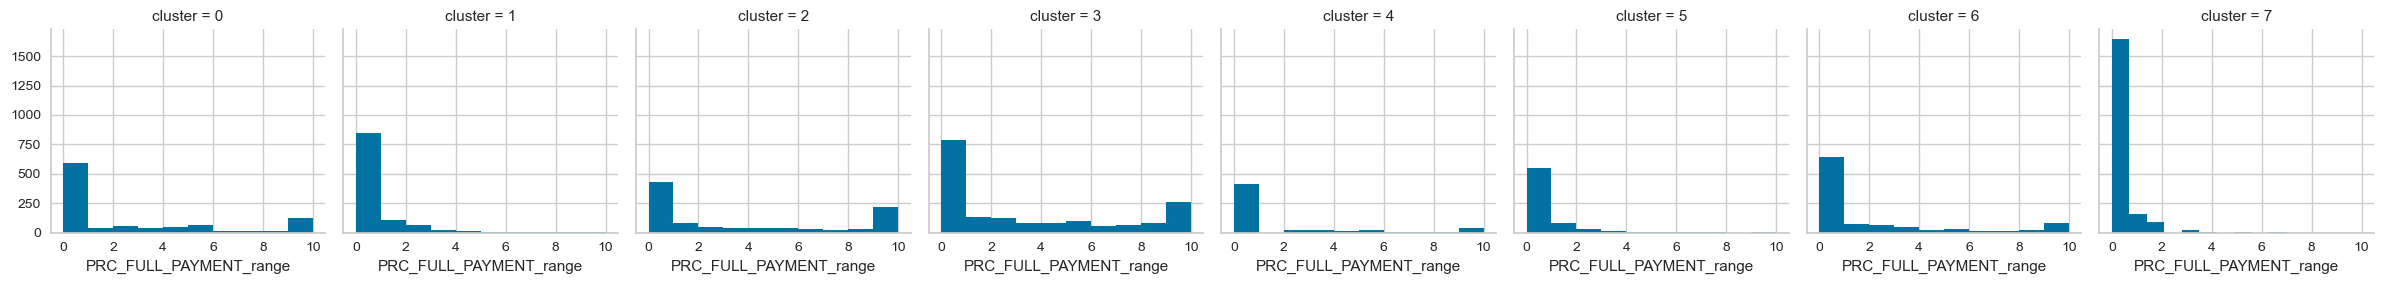

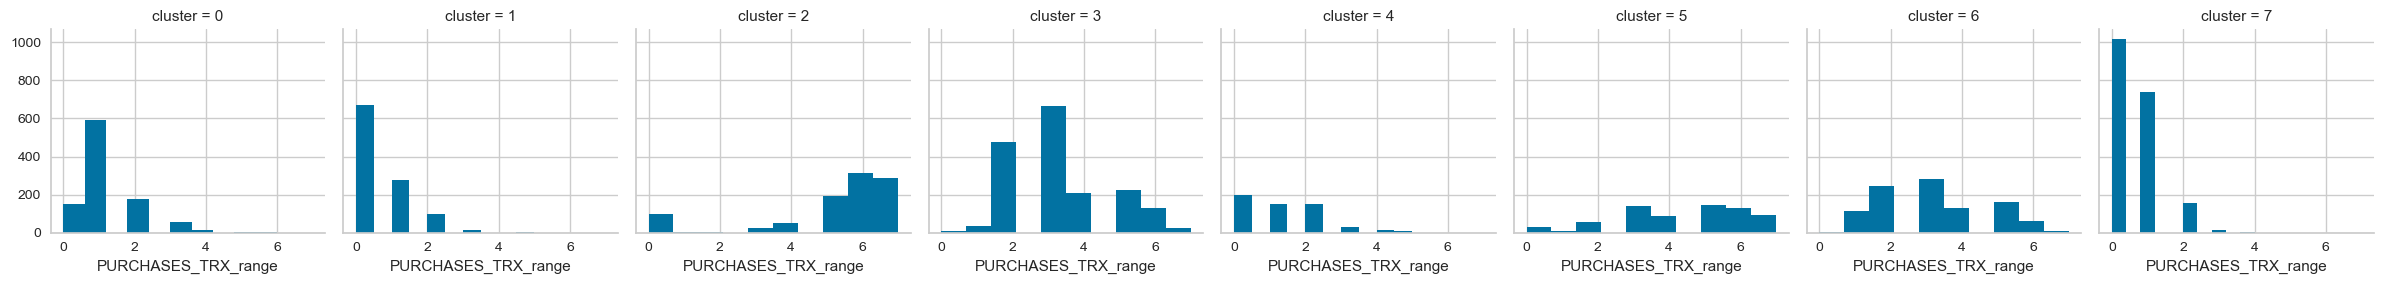

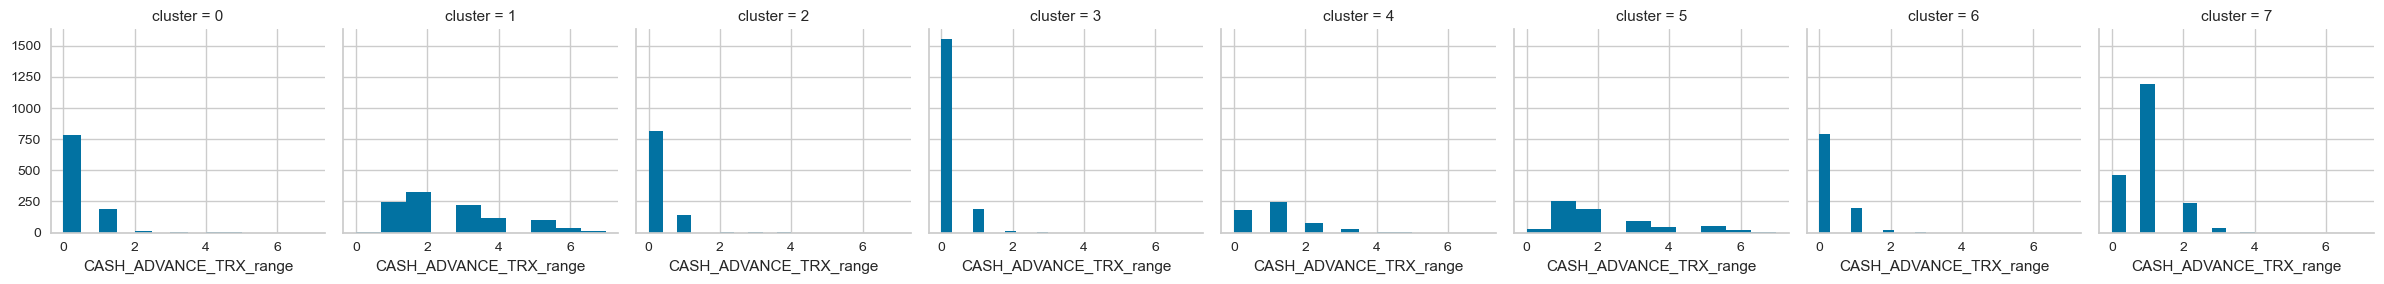

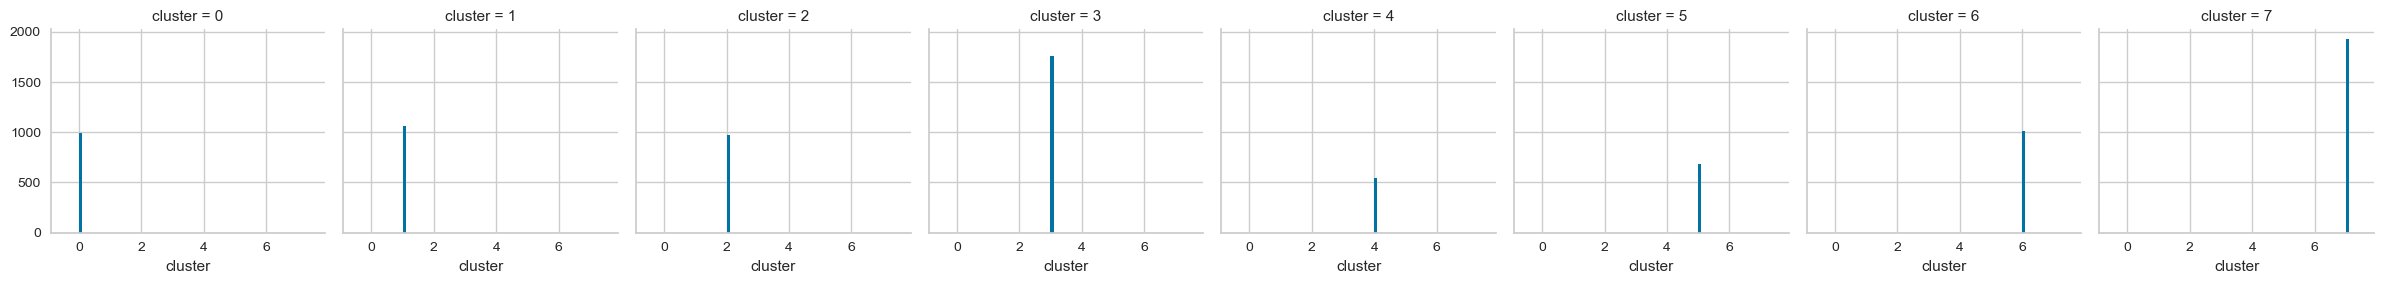

In [57]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

Визуализируем кластеры, предварительно уменьшив размерность с помощью PCA до 2-х.

In [62]:
pca = decomposition.PCA(n_components=2, random_state=42)
pca.fit(X)
X_PCA = pca.transform(X)
X_PCA.shape

(8950, 2)

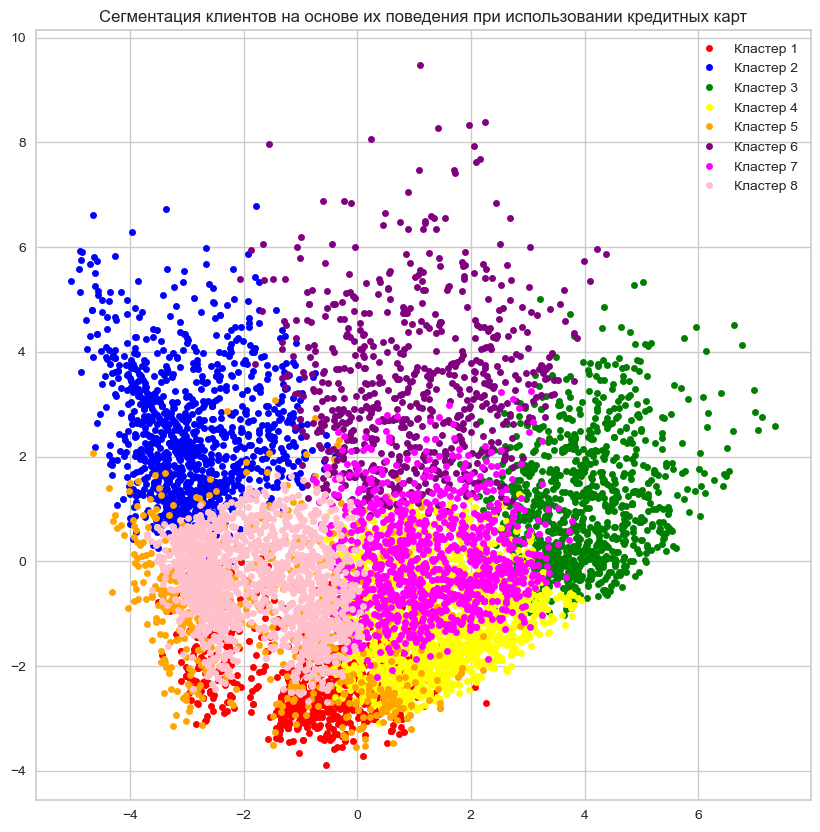

In [71]:
x, y = X_PCA[:, 0], X_PCA[:, 1]                         # Извлечение первого и второго столбцов данных PCA

# Определение словаря, который сопоставляет метки кластеров с цветами для визуализации
colors = {
    0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 
    4: 'orange', 5: 'purple', 6: 'fuchsia', 7: 'pink'}

names = {i: f'Кластер {i+1}' for i in range(k_clust)}   # Создание словаря, который сопоставляет индексы кластеров с именами
df = pd.DataFrame({'x': x, 'y': y, 'label': labels})    # Создание DF для хранения точек данных с метками кластеров
groups = df.groupby('label')                            # Группировка DataFrame по меткам кластеров

# Визуализация
fig, ax = plt.subplots(figsize=(10, 10)) 

# Отдельно отображение точек данных каждого кластера с разными цветами и маркерами
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name], label=names[name], mec='none')
    ax.set_aspect('auto')

    # Отключение меток и делений для оси x и оси y
    ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    ax.tick_params(axis='y', which='both', left='off', top='off', labelleft='off')

ax.set_title('Сегментация клиентов на основе их поведения при использовании кредитных карт')
ax.legend()
plt.show()

Как мы видим, результат достаточно неочевидный, для более читаемой визуализации вычислим косинусоидальное расстояние от исходных данных и применим к ним PCA. Косинусоидальное расстояние имеет вид:
$$1 - \frac{u  v}{||u||_2||v||_2}$$

Реализовать функцию `cos_dist` косинусоидального расстояния на основе встроенной функции `cosine_similarity` в модуле `sklearn.metrics.pairwise`.

In [72]:
def cos_dist(X):
     return 1 - metrics.pairwise.cosine_similarity(X)

dist = cos_dist(X)

(8950, 2)

Снова визуализируем кластеры, предварительно уменьшив размерность с помощью PCA до 2-х.

In [76]:
pca = decomposition.PCA(2, random_state=42)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

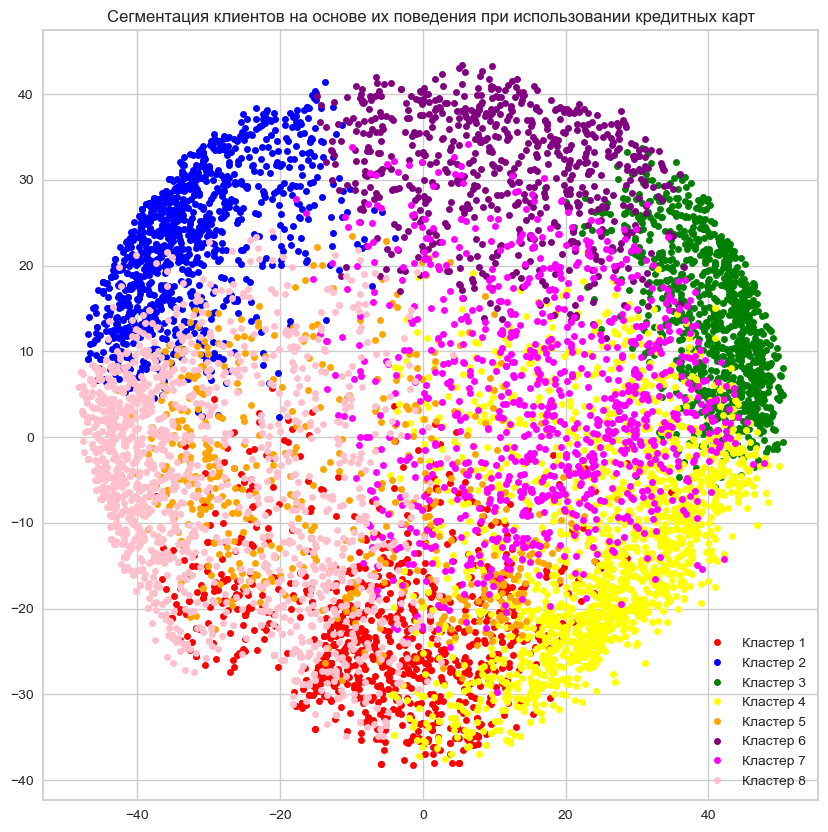

In [77]:
x, y = X_PCA[:, 0], X_PCA[:, 1]                         # Извлечение первого и второго столбцов данных PCA

# Определение словаря, который сопоставляет метки кластеров с цветами для визуализации
colors = {
    0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 
    4: 'orange', 5: 'purple', 6: 'fuchsia', 7: 'pink'}

names = {i: f'Кластер {i+1}' for i in range(k_clust)}   # Создание словаря, который сопоставляет индексы кластеров с именами
df = pd.DataFrame({'x': x, 'y': y, 'label': labels})    # Создание DF для хранения точек данных с метками кластеров
groups = df.groupby('label')                            # Группировка DataFrame по меткам кластеров

# Визуализация
fig, ax = plt.subplots(figsize=(10, 10)) 

# Отдельно отображение точек данных каждого кластера с разными цветами и маркерами
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name], label=names[name], mec='none')
    ax.set_aspect('auto')

    # Отключение меток и делений для оси x и оси y
    ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    ax.tick_params(axis='y', which='both', left='off', top='off', labelleft='off')

ax.set_title('Сегментация клиентов на основе их поведения при использовании кредитных карт')
ax.legend()
plt.show()

Визуализация получилась гораздо разборчивее.

## Выводы

В данном задании на практике:
* определено оптимальное количество кластеров
* решена задачу кластеризации
* снижена размерность до 2-х мерной с помощью PCA
* данные преобразованы для лучшей визуализации с помощью косинусоидального расстояния